data sources: 

- ERSST: [http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc](http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc) 

### imports 

In [1]:
%matplotlib inline

### scipy
import numpy as np
import pandas as pd
import xarray as xr
import geopandas as gpd
import cartopy.crs as ccrs

### plotting
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
import regionmask

In [3]:
import pathlib

HOME = pathlib.Path.home()
CWD = pathlib.Path.cwd()

In [5]:
year_start = 1980
year_end = 2022

### reads in the ERSST dataset (from the NOAA's openDAP server)

In [4]:
url = "http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc"	
ds = xr.open_dataset(url, drop_variables=["time_bnds"])

### select period here 

In [6]:
ds = ds.sel(time=slice(str(year_start),str(year_end)))

In [7]:
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 516)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2022-12-01
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes: (12/39)
    climatology:                     Climatology is based on 1971-2000 SST, X...
    description:                     In situ data: ICOADS2.5 before 2007 and ...
    keywords_vocabulary:             NASA Global Change Master Directory (GCM...
    keywords:                        Earth Science > Oceans > Ocean Temperatu...
    instrument:                      Conventional thermometers
    source_comment:                  SSTs were observed by conventional therm...
    ...                              ...
    comment:                         SSTs were observed by conventional therm...
    summary:                         ERSST.v5 is developed based on v4 after ...
    dataset_title:                   NOAA Extended Reconstructed SST V5
    _NCProperties:                   version=2,netcdf=4.6.3,hdf5=1.10.5
    data_modified:                   2023-01-04
    DODS_EXTRA.Unlimited_Dimension:  time

### flip the latitudes 

In [8]:
ds = ds.sortby('lat')

In [9]:
clim = ds.sel(time=slice('1991','2020'))

In [10]:
clim = clim.groupby(clim.time.dt.month).mean('time')

In [12]:
anomalies = ds.groupby(ds.time.dt.month) - clim 

In [13]:
anomalies_y = anomalies.sel(time=str(year_end))

In [14]:
anomalies_y

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 12)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 2022-01-01 2022-02-01 ... 2022-12-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    sst      (time, lat, lon) float32 nan nan nan ... -0.0006852 -0.0009742

In [15]:
anomalies_y = anomalies_y.sel(lat=slice(-40,40), lon=slice(100, 290))

In [16]:
cbar_kwargs=dict(shrink=0.7, orientation='horizontal', pad=0.01)

/tmp/ipykernel_19853/47937999.py:7: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for ax in p.axes.flat:


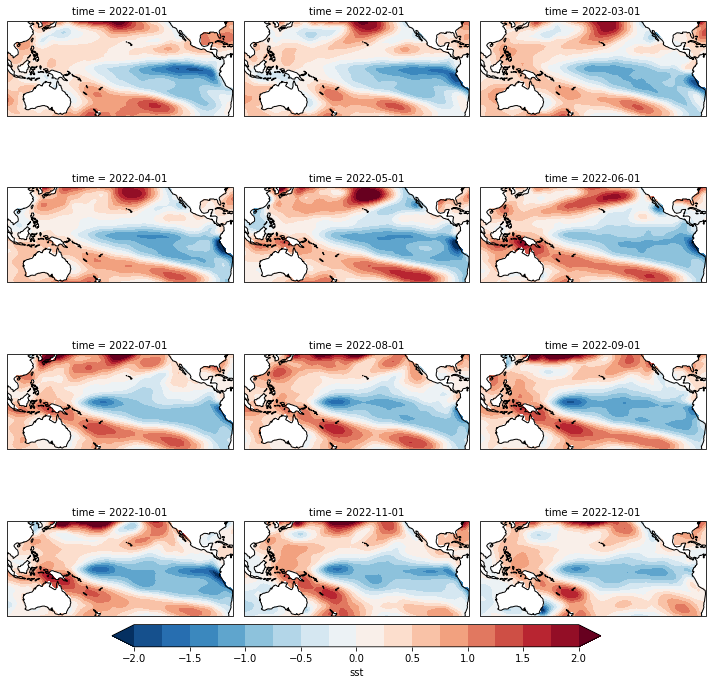

In [17]:
p = anomalies_y['sst'].plot.contourf(levels=np.arange(-2, 2.25, 0.25), transform=ccrs.PlateCarree(), \
                          col="time", \
                          col_wrap=3, \
                          cbar_kwargs=cbar_kwargs, \
                          subplot_kws={"projection": ccrs.PlateCarree(central_longitude=180)})

for ax in p.axes.flat:
    ax.coastlines()
    
f = plt.gcf()

In [18]:
f.savefig(f'../figures/SST_anomalies_{year_end}.png')